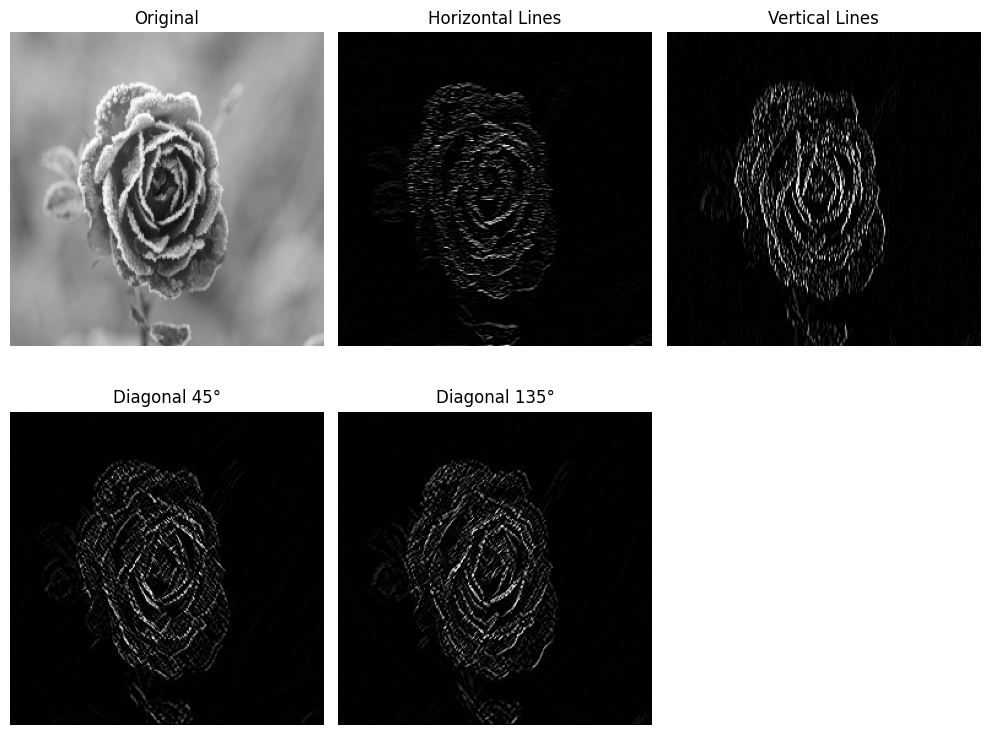

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def line_detection(image_path):
    # Read image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError("Image not found. Check the path!")

    img = cv2.resize(img, (256, 256))

    # Define filter masks
    horizontal_mask = np.array([[-1, -1, -1],
                                 [ 2,  2,  2],
                                 [-1, -1, -1]])

    vertical_mask   = np.array([[-1,  2, -1],
                                 [-1,  2, -1],
                                 [-1,  2, -1]])

    diagonal1_mask  = np.array([[ 2, -1, -1],
                                 [-1,  2, -1],
                                 [-1, -1,  2]])

    diagonal2_mask  = np.array([[-1, -1,  2],
                                 [-1,  2, -1],
                                 [ 2, -1, -1]])

    # Apply filters using cv2.filter2D
    horiz = cv2.filter2D(img, -1, horizontal_mask)
    vert  = cv2.filter2D(img, -1, vertical_mask)
    diag1 = cv2.filter2D(img, -1, diagonal1_mask)
    diag2 = cv2.filter2D(img, -1, diagonal2_mask)

    # Show results
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray')
    plt.title("Original"), plt.axis("off")

    plt.subplot(2, 3, 2), plt.imshow(horiz, cmap='gray')
    plt.title("Horizontal Lines"), plt.axis("off")

    plt.subplot(2, 3, 3), plt.imshow(vert, cmap='gray')
    plt.title("Vertical Lines"), plt.axis("off")

    plt.subplot(2, 3, 4), plt.imshow(diag1, cmap='gray')
    plt.title("Diagonal 45°"), plt.axis("off")

    plt.subplot(2, 3, 5), plt.imshow(diag2, cmap='gray')
    plt.title("Diagonal 135°"), plt.axis("off")

    plt.tight_layout()
    plt.savefig("line_detection_results.png")
    plt.show()

# Example usage
if __name__ == "__main__":
    line_detection("/content/Frozen Rose.jpg")